# Introduction

In this lab, you will learn how to use the successive halving search method to iteratively choose the best parameter combination out of multiple candidates. This method is implemented in **HalvingGridSearchCV** and **HalvingRandomSearchCV** classes from the Scikit-learn library. The **HalvingRandomSearchCV** class will be used in this lab.

# Importing Required Libraries

The following libraries will be used in this lab: **pandas**, **numpy**, **matplotlib**, **sklearn.datasets**, **RandomForestClassifier**, **randint**, and **HalvingRandomSearchCV**. Import them using the following code:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Loading the Dataset

The **make_classification** function from the **sklearn.datasets** module is used to generate a classification dataset. The dataset contains 400 samples with 12 features. The code to load the dataset is as follows:

In [2]:
rng = np.random.RandomState(0)
X, y = datasets.make_classification(n_samples=400, n_features=12, random_state=rng)

# Defining the Parameter Space

Define a dictionary **param_dist** that contains the hyperparameters and their respective values to search through. The hyperparameters are **max_depth**, **max_features**, **min_samples_split**, **bootstrap**, and **criterion**. The search range for **max_features** and **min_samples_split** is defined using the **randint** function from the **scipy.stats** module. The code to define the parameter space is as follows:

In [3]:
param_dist = {
    'max_depth': [3, None],
    'max_features': randint(1, 6),
    'min_samples_split': randint(2, 11),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

# Creating a Halving Random Search Object

Create a **HalvingRandomSearchCV** object to search through the parameter space. The object takes the following arguments:

- **estimator**: the estimator to be optimized
- **param_distributions**: the parameter space to search through
- **factor**: the factor by which the number of candidates is reduced in each iteration
- **random_state**: the random state used for the search
The code to create the object is as follows:

In [4]:
clf = RandomForestClassifier(n_estimators=20, random_state=rng)
rsh = HalvingRandomSearchCV(
    estimator=clf, param_distributions=param_dist, factor=2, random_state=rng
)

# Fitting the Halving Random Search Object

Fit the **HalvingRandomSearchCV** object to the dataset using the **fit** method. The code to fit the object is as follows:

In [5]:
rsh.fit(X, y)

HalvingRandomSearchCV(estimator=RandomForestClassifier(n_estimators=20,
                                                       random_state=RandomState(MT19937) at 0x15262AC40),
                      factor=2,
                      param_distributions={'bootstrap': [True, False],
                                           'criterion': ['gini', 'entropy'],
                                           'max_depth': [3, None],
                                           'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1378e2090>,
                                           'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x151f23800>},
                      random_state=RandomState(MT19937) at 0x15262AC40)

# Analyzing the Results

The **cv_results_** attribute of the search object contains the results of the search. Convert it to a pandas dataframe using the following code:

In [7]:
results = pd.DataFrame(rsh.cv_results_)

The **params_str** column is created by converting the **params** column to a string. Remove duplicate rows that have the same **params_str** and **iter** values:

In [8]:
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)

The mean test scores are then pivoted with respect to the iteration number and parameter combination using the **pivot** method:

In [9]:
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)

Finally, plot the mean test scores over the iterations using the following code:

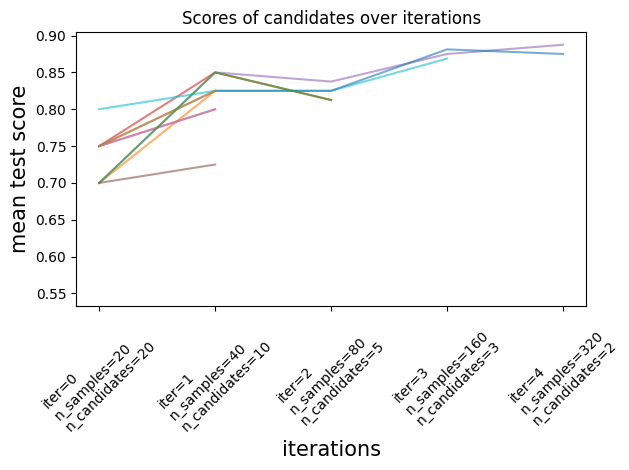

In [10]:
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={rsh.n_resources_[i]}\nn_candidates={rsh.n_candidates_[i]}"
    for i in range(rsh.n_iterations_)
]

ax.set_xticks(range(rsh.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)
plt.tight_layout()
plt.show()

# Interpretation of the Results

The plot shows the mean test scores of the candidates over the iterations. At the first iteration, all candidates are evaluated with a small amount of resources. At the second iteration, only the best half of the candidates is evaluated with double the amount of resources. This process is repeated until the last iteration, where only 2 candidates are left. The best candidate is the one with the highest mean test score at the last iteration.

# Summary

In this lab, you learned how to use the successive halving search method to iteratively choose the best parameter combination out of multiple candidates. The **HalvingRandomSearchCV** class from the Scikit-learn library was used to implement the search method. The results of the search were analyzed and interpreted using a plot of the mean test scores over the iterations.